In [1]:
import warnings as w
w.filterwarnings('ignore')
import pandas as pd

In [2]:
# Step 1: Import the data from the "social_network_ads.csv" file and store it in a variable 'df'
df = pd.read_csv("social_network_ads.csv")

# Step 2: Display the number of rows and columns in the dataset
print("Number of rows and columns:", df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
print("First few rows of the dataset:")
df.head()

Number of rows and columns: (400, 5)
First few rows of the dataset:


,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.isna().sum()

user_id             0
gender              0
age                 0
estimated_salary    0
purchased           0
dtype: int64

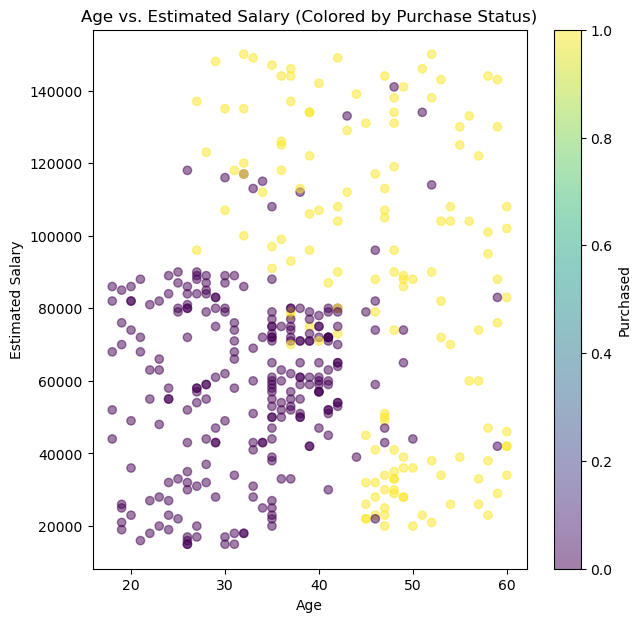

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,7))
plt.scatter(df.age,df.estimated_salary,c = df['purchased'], cmap = 'viridis',alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs. Estimated Salary (Colored by Purchase Status)')
plt.colorbar(label='Purchased')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
df.gender = df.gender.map({'Male' : 0, 'Female':1})
X = df[['age','estimated_salary','gender']]
y = df.purchased
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.linear_model import  LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [[ 1.99914592e-01  3.33049168e-05 -2.49140902e-01]]
Model intercept: [-10.88919899]


In [10]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report as c
report = c(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120

